# PROJECT: CHECK OUT THE COMMON PATTERNS OF AIRBNB TOP HOSTS IN NYC

### SLIDE POWERPOINT: [LINK HERE](https://docs.google.com/presentation/d/1tJdPsLuqZ-HjOG3GHH-Zgu3kguzDqsj6/edit#slide=id.p1)

### Table Of Contents
*   Introduction
*   Objective
*   Questions
*   Data Wrangling
*   Data Analysis & Exploratory Data Analysis
*   Conclusions

## Introduction


> This dataset contains more than 37,000 rows representing booking, generally quarterly data for the last 12 months on AIRBNB in New York City. The dataset shows general information about one booking, from the host's information to the customer's reviews. There are 73 different fields representing 73 different columns. Let's clean and check out the dataset to see if we can find any insights here


## Objective



> As a person who loves traveling, I have booked Airbnb several times. My experiences were different every time, and there were some rooms that I knew were a big bargain right at the moment I came to and vice versa. There were rooms I would never want to book again. So most of the Airbnb bookings are decorated with different styles: French style, vintage, modern, or even minimalist. By starting this project, I want to understand the overall pictures of Airbnb bookings in New York City - the most populous city in the United States and find the typical patterns of Top-hosts, to understand what they have done to attract more people to book their rooms. Is it because of the enormous, massive places with beautiful views only? Or could it be because of something else?  

## Questions: WHAT ARE THE COMMON PATTERNS OF TOP HOSTS IN NYC?

### Data Wrangling

In [ ]:
#Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
import nltk
import numpy as np

In [ ]:
#Import, read data and make a copy of data
df = pd.read_csv('https://raw.githubusercontent.com/Annieng184/Annieng184/main/Airbnb_NewYork_USA.csv')
df2 = df.copy()
df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220603182654,2022-06-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121,https://www.airbnb.com/rooms/5121,20220603182654,2022-06-04,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220603182654,2022-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220603182654,2022-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,NaN,f,1,0,1,0,3.37
4,5203,https://www.airbnb.com/rooms/5203,20220603182654,2022-06-03,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37405,640612171111039003,https://www.airbnb.com/rooms/640612171111039003,20220603182654,2022-06-04,2nd Floor near Park and Ferry to NYC,NaN,NaN,https://a0.muscache.com/pictures/255e6d38-ce3f...,32162495,https://www.airbnb.com/users/show/32162495,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
37406,640629990855220048,https://www.airbnb.com/rooms/640629990855220048,20220603182654,2022-06-04,Empire House by Rove | Modern Williamsburg 3 B...,**New photos of new bedding arrangements and h...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,404940500,https://www.airbnb.com/users/show/404940500,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
37407,640658348674867448,https://www.airbnb.com/rooms/640658348674867448,20220603182654,2022-06-04,Private room with Shared bath on Union Square 5,Thank you for your interest.<br />Who do you r...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,408979935,https://www.airbnb.com/users/show/408979935,...,NaN,NaN,NaN,NaN,t,16,0,16,0,NaN
37408,641072234133563797,https://www.airbnb.com/rooms/641072234133563797,20220603182654,2022-06-04,"Bright East Village 1BR w/ W/D, on prime corne...",Show up and start living from day one in Downt...,This rental is located in NYC’s East Village. ...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,NaN,t,391,391,0,0,NaN


**STEP 1: CLEAN DATA**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  int64  
 1   listing_url                                   37410 non-null  object 
 2   scrape_id                                     37410 non-null  int64  
 3   last_scraped                                  37410 non-null  object 
 4   name                                          37396 non-null  object 
 5   description                                   36523 non-null  object 
 6   neighborhood_overview                         22430 non-null  object 
 7   picture_url                                   37410 non-null  object 
 8   host_id                                       37410 non-null  int64  
 9   host_url                                      37410 non-null 

In [ ]:
#Clean data, drop uneccessary columns
df2.drop(columns=['name', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'property_type', 'host_picture_url','license','reviews_per_month', 'picture_url', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'host_url', 'host_name', 'host_thumbnail_url', 'host_neighbourhood', 'host_total_listings_count', 'host_listings_count', 'longitude', 'latitude', 'neighbourhood', 'bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   description                     36523 non-null  object 
 1   neighborhood_overview           22430 non-null  object 
 2   host_id                         37410 non-null  int64  
 3   host_since                      37344 non-null  object 
 4   host_location                   37247 non-null  object 
 5   host_about                      21054 non-null  object 
 6   host_is_superhost               37344 non-null  object 
 7   host_verifications              37410 non-null  object 
 8   host_has_profile_pic            37344 non-null  object 
 9   host_identity_verified          37344 non-null  object 
 10  neighbourhood_cleansed          37410 non-null  object 
 11  neighbourhood_group_cleansed    37410 non-null  object 
 12  room_type                       

In [ ]:
#Check column with nan values
df2.isna().sum()

description                         887
neighborhood_overview             14980
host_id                               0
host_since                           66
host_location                       163
host_about                        16356
host_is_superhost                    66
host_verifications                    0
host_has_profile_pic                 66
host_identity_verified               66
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
room_type                             0
accommodates                          0
bathrooms_text                       81
bedrooms                           3654
beds                                901
amenities                             0
price                                 0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating               7949
instant_bookable                      0
calculated_host_listings_count        0


In [ ]:
#Drop nan values of columns with little effects < 1000 rows
#Fill nan values with 0 > 1000 rows
#Keep nan of neighborhood_overview and host_about for laler due to big proportion on the data
df2.dropna(subset=['description','beds','host_location', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms_text'], inplace = True) 
df2[['review_scores_rating', 'bedrooms']] = df2[['review_scores_rating', 'bedrooms']].fillna('0').astype('int')

In [ ]:
#Double check column with nan values
df2.isna().sum()

description                           0
neighborhood_overview             13630
host_id                               0
host_since                            0
host_location                         0
host_about                        15269
host_is_superhost                     0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
room_type                             0
accommodates                          0
bathrooms_text                        0
bedrooms                              0
beds                                  0
amenities                             0
price                                 0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                  0
instant_bookable                      0
calculated_host_listings_count        0


**STEP 2: DEFINE KEY METRICS AND HIGH/LOW PERFORMANCE HOSTS**

In [ ]:
#Number of unique hosts 
df2['host_id'].nunique()

23933

**CHOOSE KEY METRICS IS WEIGHTED REVIEWS**
1 host will have several listings and each listing is one line in the dataset. What we should do is groupby host_id and calculate weighted_review. Weighted review is calculated by multiplying number of reviews amd review score rating. Then group by host_id and choose the group with higher weighted_review than the avg weighted review. 

In [ ]:
#Calculate weighted reviews = number_of_reviews * review_scores_rating
#Step 1: Create new column 'weighted_review' and move it next to 'number_of_reviews' for better tracking
df2['weighted_review'] = df2['number_of_reviews'] * df2['review_scores_rating']
moving_column = df2.pop('weighted_review')
df2.insert(19, 'weighted_review', moving_column)

In [ ]:
#Drop rows with weighted review = 0 for not affecting the dataset
new_df2 = df2[df2['weighted_review'] != 0] 
new_df2.head(4)

,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,beds,amenities,price,weighted_review,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,2008-09-09,"New York, New York, United States",A New Yorker since (Phone number hidden by Air...,f,"['email', 'phone', 'work_email']",t,t,...,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",$225.00,192,30,1125,48,4,f,3
2,We welcome you to stay in our lovely 2 br dupl...,NaN,7378,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",f,"['email', 'phone']",t,t,...,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",$275.00,10,21,1125,2,5,f,1
3,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,f,"['email', 'phone']",t,f,...,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",$68.00,2144,2,14,536,4,f,1
4,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,f,"['email', 'phone']",t,t,...,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$75.00,472,2,14,118,4,f,1


In [ ]:
#Create table groupby unique host_id and their weighted_review
host_weighted = (new_df2.groupby('host_id')['weighted_review'].sum().sort_values(ascending = False).reset_index())
host_weighted

,host_id,weighted_review
0,158969505,20417
1,219517861,16841
2,371972456,16816
3,397872858,11248
4,257995608,10888
...,...,...
19392,205099645,1
19393,7389352,1
19394,166794407,1
19395,297257047,1


In [ ]:
host_weighted_0 = (df2.groupby('host_id')['weighted_review'].sum().sort_values(ascending = False).reset_index())
host_weighted_0

,host_id,weighted_review
0,158969505,20417
1,219517861,16841
2,371972456,16816
3,397872858,11248
4,257995608,10888
...,...,...
23928,49900664,0
23929,49897449,0
23930,49879147,0
23931,49867487,0


In [ ]:
#Define average weighted reviews point
host_weighted['weighted_review'].mean()

200.93045316286023

In [ ]:
#Define average weighted reviews point
host_weighted_0['weighted_review'].mean()

162.84828479505285

In [ ]:
top_host = host_weighted[host_weighted['weighted_review'] > host_weighted['weighted_review'].mean()]
top_host

,host_id,weighted_review
0,158969505,20417
1,219517861,16841
2,371972456,16816
3,397872858,11248
4,257995608,10888
...,...,...
4881,227081166,203
4882,1100494,203
4883,405123379,202
4884,5278391,202


In [ ]:
bot_host = host_weighted_0[host_weighted_0['weighted_review'] < host_weighted_0['weighted_review'].mean()]
bot_host = host_weighted_0.tail(5000)
bot_host

,host_id,weighted_review
18933,78378674,4
18934,3977023,4
18935,23625464,4
18936,118913632,4
18937,44118283,4
...,...,...
23928,49900664,0
23929,49897449,0
23930,49879147,0
23931,49867487,0


In [ ]:
#Merge the table above with the big table for overall top host performance
top_host_table = pd.merge(top_host, new_df2, on = 'host_id', how = 'inner')
top_host_table

,host_id,weighted_review_x,description,neighborhood_overview,host_since,host_location,host_about,host_is_superhost,host_verifications,host_has_profile_pic,...,beds,amenities,price,weighted_review_y,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,158969505,20417,Lovely studio in the heart of the Lower East s...,"Lower East Side location near the New Museum, ...",2017-11-16,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,t,"['email', 'phone']",t,...,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$150.00,56,30,1125,14,4,f,208
1,158969505,20417,Welcome to this charming 2 Bedroom Manhattan e...,"Lower East Side location near the New Museum, ...",2017-11-16,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,t,"['email', 'phone']",t,...,2.0,"[""Essentials"", ""Washer"", ""Cooking basics"", ""Wi...",$200.00,40,30,1125,10,4,f,208
2,158969505,20417,Unique 2 Bedroom apartment located in Lower Ea...,"Lower East Side location near the New Museum, ...",2017-11-16,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,t,"['email', 'phone']",t,...,2.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$200.00,28,30,1125,7,4,f,208
3,158969505,20417,"Open, lots of natural light studio apartment. ...","Lower East Side location near the New Museum, ...",2017-11-16,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,t,"['email', 'phone']",t,...,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$175.00,25,30,1125,5,5,f,208
4,158969505,20417,The apartment is located in the heart of Lower...,"Lower East Side location near the New Museum, ...",2017-11-16,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,t,"['email', 'phone']",t,...,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$175.00,44,30,1125,11,4,f,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10888,5278391,202,"A private, light & spacious room overlooking a...",NaN,2013-03-01,"New York, New York, United States",I live in Brooklyn and work as a freelance vid...,t,"['email', 'phone']",t,...,1.0,"[""Essentials"", ""Clothing storage: closet"", ""Sh...",$95.00,92,2,365,23,4,f,5
10889,5278391,202,The whole group will enjoy easy access to grea...,NaN,2013-03-01,"New York, New York, United States",I live in Brooklyn and work as a freelance vid...,t,"['email', 'phone']",t,...,2.0,"[""Dedicated workspace"", ""Carbon monoxide alarm...",$210.00,15,3,365,3,5,f,5
10890,5278391,202,You will enjoy easy access to great restaurant...,NaN,2013-03-01,"New York, New York, United States",I live in Brooklyn and work as a freelance vid...,t,"['email', 'phone']",t,...,1.0,"[""Wine glasses"", ""Essentials"", ""Bathtub"", ""Por...",$140.00,5,2,365,1,5,f,5
10891,8351424,201,It is an Old Building in the Washington Height...,NaN,2013-08-23,"New York, New York, United States",Anthony Lalor an actor from nyc. I tend to go...,t,"['email', 'phone']",t,...,1.0,"[""Essentials"", ""Washer"", ""Wifi"", ""Carbon monox...",$137.00,196,2,1125,49,4,t,2


In [ ]:
#Merge the table above with the big table for overall top host performance
bot_host_table = pd.merge(bot_host, df2, on = 'host_id', how = 'inner')
bot_host_table

,host_id,weighted_review_x,description,neighborhood_overview,host_since,host_location,host_about,host_is_superhost,host_verifications,host_has_profile_pic,...,beds,amenities,price,weighted_review_y,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,78378674,4,"This is cute space setup for 1 person, in the ...",Super cool Neighborhood. Safe and close to eve...,2016-06-18,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,1.0,"[""Heating"", ""Essentials"", ""Hair dryer"", ""Hot w...",$40.00,4,30,1125,1,4,f,1
1,3977023,4,"This comfortable room has high ceilings, big w...",The apartment is in a beautiful and friendly b...,2012-10-25,"New York, New York, United States",I study Anthropology at the New School. I am o...,f,"['email', 'phone']",t,...,1.0,"[""Heating"", ""Essentials"", ""Long term stays all...",$70.00,4,30,1125,1,4,t,2
2,3977023,4,"My place is close to Cobble Hill Cinemas, Cafe...",NaN,2012-10-25,"New York, New York, United States",I study Anthropology at the New School. I am o...,f,"['email', 'phone']",t,...,1.0,"[""Essentials"", ""Hair dryer"", ""Long term stays ...",$75.00,0,30,38,0,0,f,2
3,23625464,4,This is a lovely room in a Brooklyn apartment ...,The neighborhood is on the border between hist...,2014-11-11,"Frisco, Texas, United States",NaN,f,"['email', 'phone']",t,...,1.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Essentials...",$28.00,4,30,30,1,4,f,1
4,118913632,4,It is a spacious apartment in the 2nd floor of...,"The house is down the block from 5th Ave, a pr...",2017-03-02,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,3.0,"[""Carbon monoxide alarm"", ""Shampoo"", ""Essentia...",$65.00,4,30,1125,1,4,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,49900664,0,This is a sunny and bright studio in the class...,"When running around the city, you'll want to c...",2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone', 'work_email']",t,...,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$100.00,0,30,1125,2,0,f,1
5497,49897449,0,"Hi, this is a cozy bedroom in Bushwick, nice a...",NaN,2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,1.0,"[""Long term stays allowed""]",$50.00,0,30,1125,0,0,f,1
5498,49879147,0,All Inclusive apt with full bathroom and kitch...,NaN,2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,1.0,"[""Shampoo"", ""Essentials"", ""Hot tub"", ""Iron"", ""...",$75.00,0,30,1125,0,0,f,1
5499,49867487,0,Hello Art maker! <br />This is a day space for...,NaN,2015-11-25,"Jersey City, New Jersey, United States",NaN,f,"['email', 'phone']",t,...,1.0,"[""Kitchen"", ""Wifi"", ""Hot water"", ""Long term st...",$33.00,0,30,1125,0,0,f,1


In [ ]:
top_host_table['host_since_year'] = top_host_table['host_since'].str.slice(0,4,1)
top_host_table['host_since_year']

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
10888    2013
10889    2013
10890    2013
10891    2013
10892    2013
Name: host_since_year, Length: 10893, dtype: object

In [ ]:
bot_host_table['host_since_year'] = bot_host_table['host_since'].str.slice(0,4,1)
bot_host_table['host_since_year']

0       2016
1       2012
2       2012
3       2014
4       2017
        ... 
5496    2015
5497    2015
5498    2015
5499    2015
5500    2022
Name: host_since_year, Length: 5501, dtype: object

**STEP 3: START TO ANALYZE USING ALL THE INFO IN TOP_HOST_TABLE**
- Is Superhost affect? (Host at least 10 guests / Maintain a 90% or higher response rate / Maintain a 1% or lower cancellation rate / Maintain a 4.8 overall rating)
- Is profile pic important?
- Is location important?
- Is full verification important to host? (email, phone, work email)
- Instant book?
- Hosting time? the longer the better performance?

**Is superhost important to have high performance? => MAYBE**

In [ ]:
top_host_table.groupby('host_id')['host_is_superhost'].max().value_counts()

f    2721
t    2165
Name: host_is_superhost, dtype: int64

In [ ]:
bot_host_table.groupby('host_id')['host_is_superhost'].max().value_counts()

f    4955
t      45
Name: host_is_superhost, dtype: int64

**Is profile pic important to have high performance? => YES**

In [ ]:
top_host_table.groupby('host_id')['host_has_profile_pic'].max().value_counts()

t    4875
f      11
Name: host_has_profile_pic, dtype: int64

In [ ]:
bot_host_table.groupby('host_id')['host_has_profile_pic'].max().value_counts()

t    4877
f     123
Name: host_has_profile_pic, dtype: int64

**Is host identity verified important to have high performance? => YES**

In [ ]:
top_host_table.groupby('host_id')['host_identity_verified'].max().value_counts()

t    4100
f     786
Name: host_identity_verified, dtype: int64

In [ ]:
bot_host_table.groupby('host_id')['host_identity_verified'].max().value_counts()

t    3710
f    1290
Name: host_identity_verified, dtype: int64

**What time of verification important to have high performance? => at least 'email' and 'phone'. 'Work email' is good to have but unnecessary**

In [ ]:
top_host_table.groupby('host_id')['host_verifications'].max().value_counts()

['email', 'phone']                  3980
['email', 'phone', 'work_email']     637
['phone']                            253
['phone', 'work_email']               11
[]                                     3
['email']                              2
Name: host_verifications, dtype: int64

In [ ]:
bot_host_table.groupby('host_id')['host_verifications'].max().value_counts()

['email', 'phone']                  3944
['phone']                            524
['email', 'phone', 'work_email']     475
['email']                             22
['phone', 'work_email']               17
[]                                    16
['email', 'work_email']                2
Name: host_verifications, dtype: int64

**Is host instant book important to have high performance? => NO**

In [ ]:
top_host_table.groupby('host_id')['instant_bookable'].max().value_counts()

f    3346
t    1540
Name: instant_bookable, dtype: int64

In [ ]:
bot_host_table.groupby('host_id')['instant_bookable'].max().value_counts()

f    4256
t     744
Name: instant_bookable, dtype: int64

In [ ]:
#What time of room more likely to have higher performance? => Entire home/apt & private room
room = top_host_table['room_type'].value_counts().reset_index()
room.columns = ['Room Types', 'Counts']
room

,Room Types,Counts
0,Entire home/apt,5969
1,Private room,4673
2,Shared room,149
3,Hotel room,102


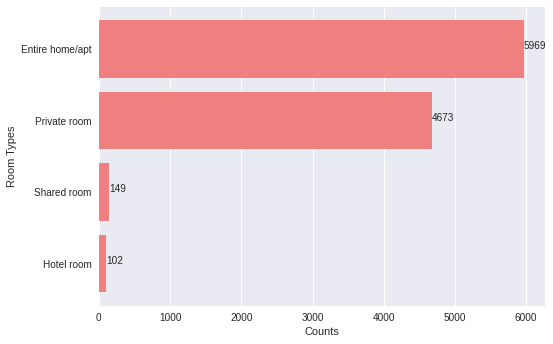

In [ ]:
sns.barplot(x= room['Counts'], y= room['Room Types'], data=room, color = 'lightcoral')
x = room['Room Types'].to_list()
y = room['Counts'].to_list()
plt.barh(x, y, color = 'lightcoral')
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

In [ ]:
#How many people is most prefered in these top performance listings? => Couple > 4 people > Solo
top_host_table['accommodates'].value_counts() 

2     5071
4     1727
1     1214
3     1089
6      649
5      553
8      232
7      137
10      73
12      41
9       34
16      28
11      16
14      11
15      11
13       7
Name: accommodates, dtype: int64

In [ ]:
len(top_host_table.groupby('host_id'))

4886

In [ ]:
#How many listing counts in these top performance host? => 1,2,3,4,5,6,7,8....
listings = top_host_table.groupby('host_id')['calculated_host_listings_count'].max().value_counts().reset_index()
listings.columns = ['Number_of_listings', 'Counts']
listings['Percentage'] =round((listings['Counts'] / len(top_host_table.groupby('host_id'))) * 100, 2)
listings.head(10)

,Number_of_listings,Counts,Percentage
0,1,2974,60.87
1,2,955,19.55
2,3,407,8.33
3,4,196,4.01
4,5,100,2.05
5,6,64,1.31
6,7,48,0.98
7,8,25,0.51
8,9,17,0.35
9,10,15,0.31


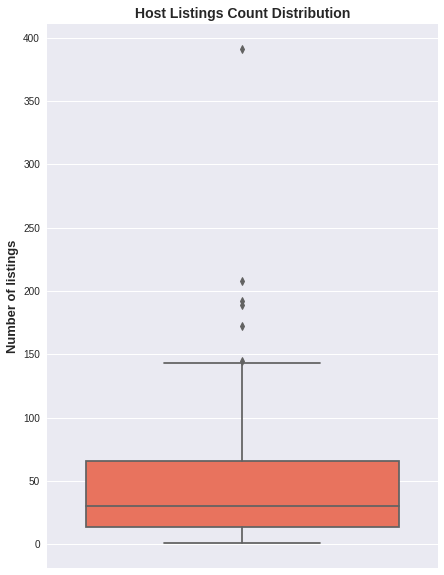

In [ ]:
plt.figure(figsize = (7, 10))
sns.boxplot(data = listings, 
             y = 'Number_of_listings', color = 'tomato')
plt.ylabel('Number of listings', fontweight = 'bold', size = 13)
plt.xlabel('')
plt.title('Host Listings Count Distribution', fontweight = 'bold', size = 14)
plt.show()

**Is the longer time the host on airbnb important?**


In [ ]:
since_year = top_host_table.groupby('host_id')['host_since_year'].min().value_counts().reset_index()
since_year.columns = ['Year','Counts']
since_year = since_year.sort_values(by = 'Year')
since_year

,Year,Counts
14,2008,4
12,2009,53
10,2010,143
8,2011,309
5,2012,472
3,2013,522
2,2014,599
0,2015,643
1,2016,612
4,2017,478


In [ ]:
bot_since_year = bot_host_table.groupby('host_id')['host_since_year'].min().value_counts().reset_index()
bot_since_year.columns = ['Year','Counts']
bot_since_year = bot_since_year.sort_values(by = 'Year')
bot_since_year

,Year,Counts
14,2008,1
13,2009,17
12,2010,64
10,2011,179
4,2012,383
3,2013,562
1,2014,781
0,2015,927
2,2016,621
5,2017,346


**Top hosts have been on Airbnb for 4-8 years, since 2014 - 2018. The number of hosts since 2021 are growing strong**

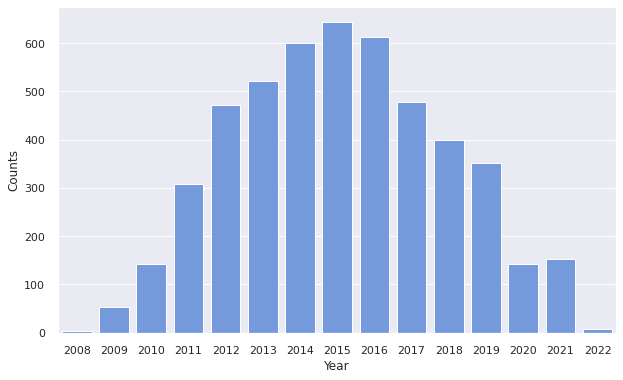

In [ ]:
#Host timeline on Airbnb
plt.figure(figsize = (10,6))
sns.set_theme()
sns.barplot(data = since_year,
              x = 'Year',
            y = 'Counts', color = 'cornflowerblue')
plt.show()

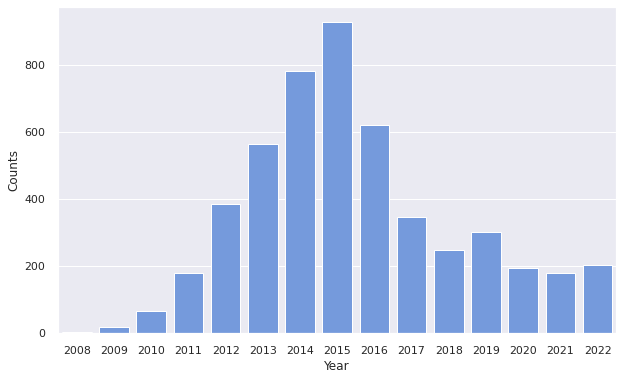

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme()
sns.barplot(data = bot_since_year,
              x = 'Year',
            y = 'Counts', color = 'cornflowerblue')
plt.show()

**AMENITIES**

In [ ]:
bot_host_table

,host_id,weighted_review_x,description,neighborhood_overview,host_since,host_location,host_about,host_is_superhost,host_verifications,host_has_profile_pic,...,amenities,price,weighted_review_y,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,host_since_year
0,78378674,4,"This is cute space setup for 1 person, in the ...",Super cool Neighborhood. Safe and close to eve...,2016-06-18,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,"[""Heating"", ""Essentials"", ""Hair dryer"", ""Hot w...",$40.00,4,30,1125,1,4,f,1,2016
1,3977023,4,"This comfortable room has high ceilings, big w...",The apartment is in a beautiful and friendly b...,2012-10-25,"New York, New York, United States",I study Anthropology at the New School. I am o...,f,"['email', 'phone']",t,...,"[""Heating"", ""Essentials"", ""Long term stays all...",$70.00,4,30,1125,1,4,t,2,2012
2,3977023,4,"My place is close to Cobble Hill Cinemas, Cafe...",NaN,2012-10-25,"New York, New York, United States",I study Anthropology at the New School. I am o...,f,"['email', 'phone']",t,...,"[""Essentials"", ""Hair dryer"", ""Long term stays ...",$75.00,0,30,38,0,0,f,2,2012
3,23625464,4,This is a lovely room in a Brooklyn apartment ...,The neighborhood is on the border between hist...,2014-11-11,"Frisco, Texas, United States",NaN,f,"['email', 'phone']",t,...,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Essentials...",$28.00,4,30,30,1,4,f,1,2014
4,118913632,4,It is a spacious apartment in the 2nd floor of...,"The house is down the block from 5th Ave, a pr...",2017-03-02,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,"[""Carbon monoxide alarm"", ""Shampoo"", ""Essentia...",$65.00,4,30,1125,1,4,f,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,49900664,0,This is a sunny and bright studio in the class...,"When running around the city, you'll want to c...",2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone', 'work_email']",t,...,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",$100.00,0,30,1125,2,0,f,1,2015
5497,49897449,0,"Hi, this is a cozy bedroom in Bushwick, nice a...",NaN,2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,"[""Long term stays allowed""]",$50.00,0,30,1125,0,0,f,1,2015
5498,49879147,0,All Inclusive apt with full bathroom and kitch...,NaN,2015-11-25,"New York, New York, United States",NaN,f,"['email', 'phone']",t,...,"[""Shampoo"", ""Essentials"", ""Hot tub"", ""Iron"", ""...",$75.00,0,30,1125,0,0,f,1,2015
5499,49867487,0,Hello Art maker! <br />This is a day space for...,NaN,2015-11-25,"Jersey City, New Jersey, United States",NaN,f,"['email', 'phone']",t,...,"[""Kitchen"", ""Wifi"", ""Hot water"", ""Long term st...",$33.00,0,30,1125,0,0,f,1,2015


In [ ]:
import re
def clean_text(x):
    # Remove html tag
    raw = BeautifulSoup(x, "html.parser")
    raw = raw.get_text()

    # Remove non-alphabetic characters + lowercase
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()
    return clean

top_host_table['amenities'] = top_host_table['amenities'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
bot_host_table['amenities'] = bot_host_table['amenities'].apply(clean_text)

In [ ]:
#Top host amenities clean
result_dict = {}

def count_word(sentence):
    for word in sentence.split('    '):
        if word not in result_dict:
            result_dict[word] = 1
        else:
            result_dict[word] += 1
            
top_host_table['amenities'].apply(count_word)

0        None
1        None
2        None
3        None
4        None
         ... 
10888    None
10889    None
10890    None
10891    None
10892    None
Name: amenities, Length: 10893, dtype: object

In [ ]:
#Bot host amenities clean
bot_dict = {}

def count_word(sentence):
    for word in sentence.split('    '):
        if word not in bot_dict:
            bot_dict[word] = 1
        else:
            bot_dict[word] += 1
            
bot_host_table['amenities'].apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
5496    None
5497    None
5498    None
5499    None
5500    None
Name: amenities, Length: 5501, dtype: object

In [ ]:
#Number of each amenities counted in top_host_table
amenities = pd.Series(result_dict).sort_values(ascending=False)[:30].reset_index()
amenities.columns = ['Items', 'Numbers']
amenities

,Items,Numbers
0,smoke alarm,10273
1,wifi,9970
2,long term stays allowed,9605
3,heating,9488
4,hair dryer,9066
5,hot water,9051
6,iron,8963
7,kitchen,8727
8,hangers,8587
9,air conditioning,8582


In [ ]:
#Number of each amenities counted in bot_host_table
bot_amenities = pd.Series(bot_dict).sort_values(ascending=False)[:30].reset_index()
bot_amenities.columns = ['Items', 'Numbers']
bot_amenities

,Items,Numbers
0,long term stays allowed,5027
1,kitchen,4806
2,smoke alarm,4327
3,air conditioning,3997
4,wifi,3313
5,essentials,3301
6,heating,3273
7,tv,2646
8,hair dryer,2190
9,washer,2142


In [ ]:
amenities['Items'].tolist()

['smoke alarm',
 'wifi',
 'long term stays allowed',
 'heating',
 'hair dryer',
 'hot water',
 'iron',
 'kitchen',
 'hangers',
 'air conditioning',
 'carbon monoxide alarm',
 'dishes and silverware',
 'refrigerator',
 'shampoo',
 'cooking basics',
 'coffee maker',
 'bed linens',
 'free street parking',
 'fire extinguisher',
 'microwave',
 'stove',
 'oven',
 'first aid kit',
 'essentials',
 '  essentials',
 'tv',
 'extra pillows and blankets',
 'private entrance',
 'security cameras on property',
 'cable tv']

In [ ]:
#Count number of 
top_host_table['total_amenities'] = top_host_table['amenities'].str.split('    ').str.len()
top_host_table['total_amenities'].value_counts().head(20)

25    407
30    405
26    398
24    395
28    394
23    393
27    391
29    370
22    347
32    339
16    332
20    330
21    330
31    327
15    311
34    286
33    285
18    284
19    267
17    265
Name: total_amenities, dtype: int64

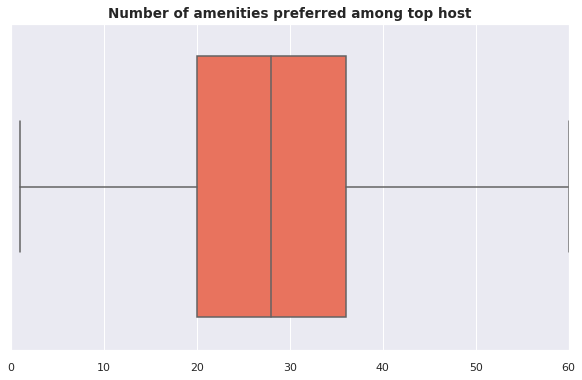

In [ ]:
#Boxplot number of amenities needed (AROUND 20 - 34 ITEMS)

plt.figure(figsize = (10,6))
sns.boxplot(data = top_host_table,
              x = 'total_amenities', color = 'tomato')
plt.xlim(0,60)
plt.xlabel('')
plt.title('Number of amenities preferred among top host', fontweight = 'bold', size = 13.5)
plt.show()

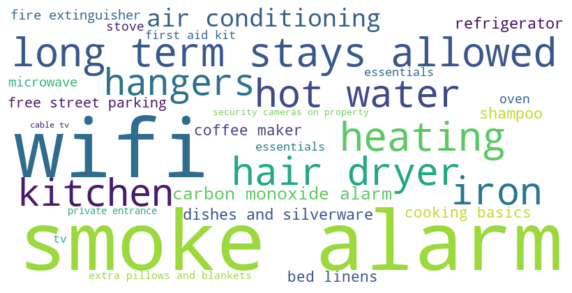

In [ ]:
#Top 30 Amenities needed for top hosts
data = dict(zip(amenities['Items'].tolist(), amenities['Numbers'].tolist()))
data = amenities.set_index('Items').to_dict()['Numbers']
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**PRICE**

In [ ]:
#Change price to int for better calculating
top_host_table['price'] = top_host_table['price'].str.replace(',', '').str.strip('$')
top_host_table['price'] = top_host_table['price'].astype('float').astype('int')

In [ ]:
#Check max min 
print('max price: ', top_host_table['price'].max())
print('min price: ', top_host_table['price'].min())
print('avg price: ', top_host_table['price'].mean())

max price:  9999
min price:  10
avg price:  175.0153309464794


In [ ]:
price_count = top_host_table['price'].value_counts()[0:50].reset_index().sort_values(by = 'price', ascending = False)
price_count.columns = ['price', 'count']
price_count['price'] = price_count['price'].astype('str')

In [ ]:
price_count['price'] = price_count['price'].astype('int')
price_count.sort_values(by = 'price', ascending = True).head(10)

,price,count
41,35,60
30,40,76
18,45,108
6,50,152
10,55,140
44,59,58
7,60,151
1,65,189
36,68,67
28,69,81


In [ ]:
top_host_table['price'].value_counts()

150    209
65     189
75     185
100    168
200    154
      ... 
697      1
588      1
639      1
690      1
675      1
Name: price, Length: 671, dtype: int64

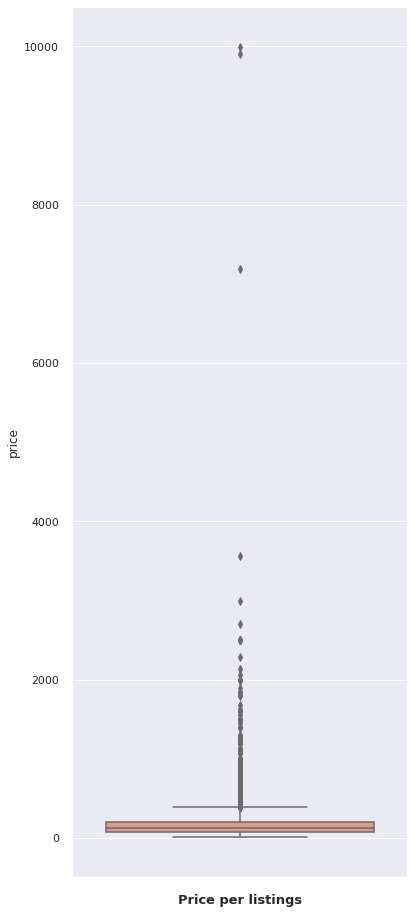

In [ ]:
#Boxplot to check outliers
plt.figure(figsize = (6,16))
sns.boxplot(data = top_host_table,
              y = 'price', color = 'darksalmon')
plt.xlabel('Price per listings', size = 13, fontweight = 'bold')
plt.show()

**PRICE PER ROOM TYPE?**

In [ ]:
top_host_table['weighted_review_y']

0         56
1         40
2         28
3         25
4         44
        ... 
10888     92
10889     15
10890      5
10891    196
10892      5
Name: weighted_review_y, Length: 10893, dtype: int64

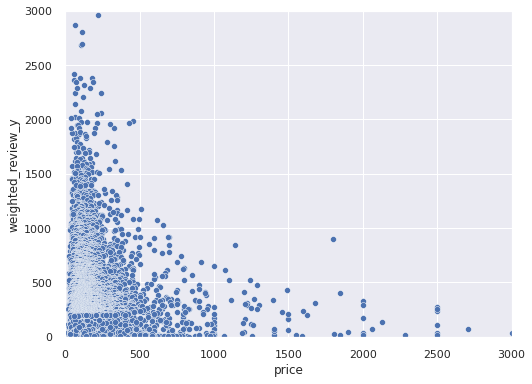

In [ ]:
#Correlation between price and weighted_reviews
plt.figure(figsize = (8,6))
sns.scatterplot(data=top_host_table,
                x='price',
                y='weighted_review_y')
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.show()

In [ ]:
top_host_table['room_type'].value_counts()

Entire home/apt    5969
Private room       4673
Shared room         149
Hotel room          102
Name: room_type, dtype: int64

**'Entire home/apt' price  => FROM $100 - $250**

In [ ]:
top_host_table[top_host_table['room_type'] == 'Entire home/apt']['price'].value_counts().head(20)

150    185
200    133
125    124
175    105
250     91
120     89
165     88
110     87
160     85
100     84
130     78
185     76
170     68
99      65
180     63
140     62
90      60
199     60
225     60
135     56
Name: price, dtype: int64

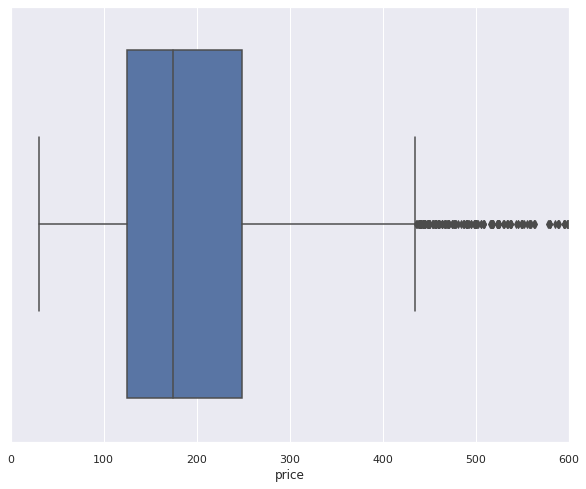

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = top_host_table[top_host_table['room_type'] == 'Entire home/apt'],
              x = 'price')
plt.xlim(0,600)
plt.show()

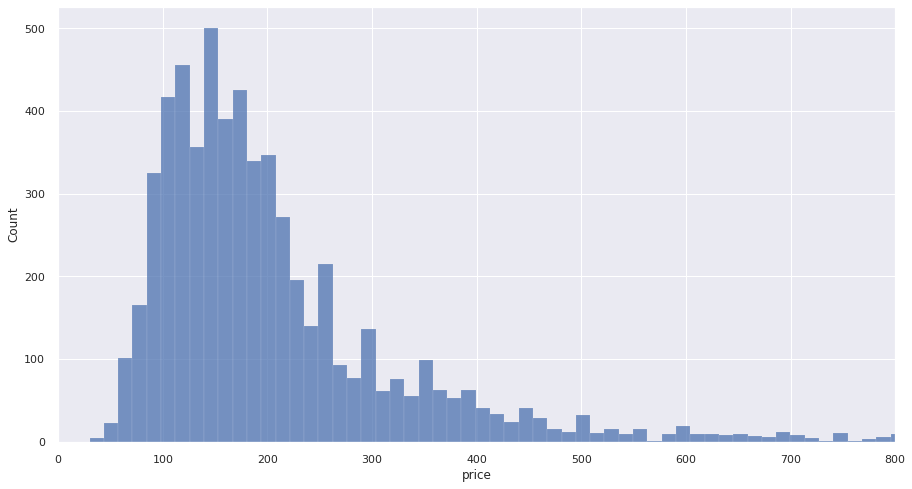

In [ ]:
#histplot for price roomtype = 'Entire home/apt' => FROM $110 - $250
plt.figure(figsize = (15,8))
sns.histplot(data = top_host_table[top_host_table['room_type'] == 'Entire home/apt'],
              x = 'price')
plt.xlim(0,800)
plt.show()

Private room price => FROM 40-100

In [ ]:
top_host_table[top_host_table['room_type'] == 'Private room']['price'].value_counts().head(20)

65     170
75     149
50     147
60     140
55     131
80     115
70     110
45      99
100     82
85      80
337     80
99      79
95      69
40      67
69      66
68      61
90      58
76      53
79      53
59      52
Name: price, dtype: int64

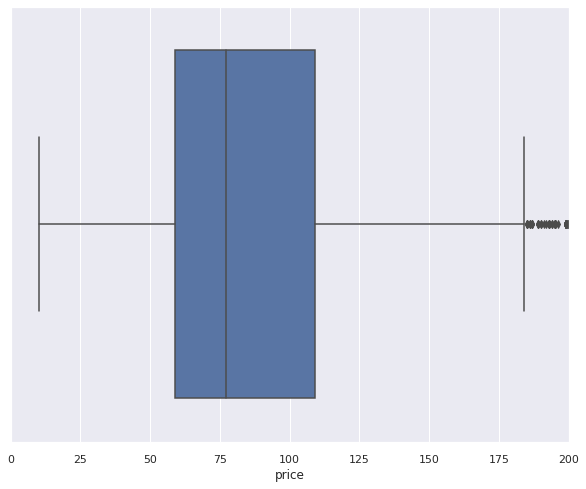

In [ ]:
#boxplot for price roomtype = 'Private room' => FROM $55 - $100
plt.figure(figsize = (10,8))
sns.boxplot(data = top_host_table[top_host_table['room_type'] == 'Private room'],
              x = 'price')
plt.xlim(0,200)
plt.show()

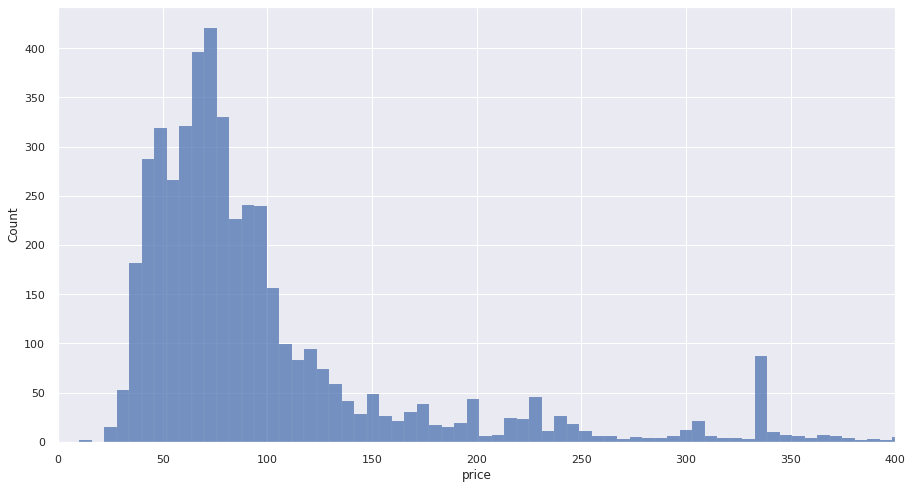

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(data = top_host_table[top_host_table['room_type'] == 'Private room'],
              x = 'price')
plt.xlim(0,400)
plt.show()

**NEIGHBORS/LOCATION**

In [ ]:
#Neighborhood Groups in NYC?
top_host_table['neighbourhood_group_cleansed'].value_counts()

Manhattan        4549
Brooklyn         3733
Queens           2027
Bronx             436
Staten Island     148
Name: neighbourhood_group_cleansed, dtype: int64

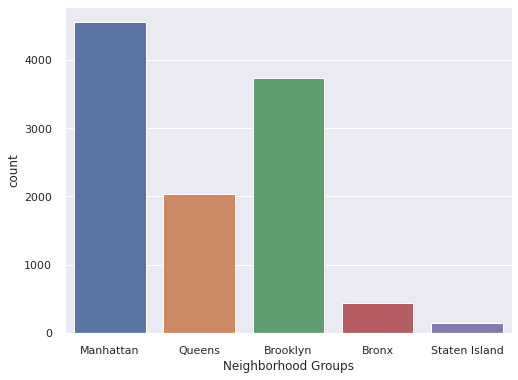

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = top_host_table,
              x = 'neighbourhood_group_cleansed')
plt.xlabel('Neighborhood Groups')
plt.show()

**NEIGHBORS/LOCATION - PRICE**

In [ ]:
palette ={'Manhattan': "firebrick", "Queens": "bisque", "Brooklyn": "lightseegreen", 'Bronx': 'lightseeblue', 'Staten Island': 'pink'}


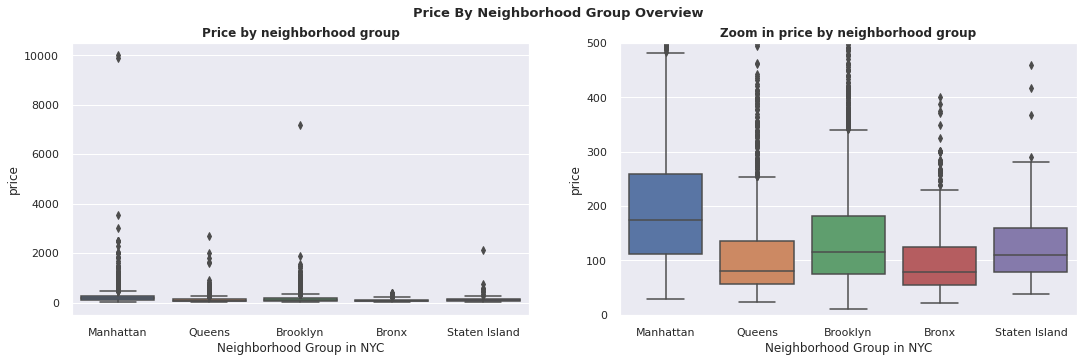

In [ ]:
#Price by neighborhood group
fig = plt.figure(figsize = (18,5))

palette ={'Manhattan': "C0", "Queens": "C1", "Brooklyn": "C2", 'Bronx': 'C3', 'Staten Island': 'C4'}

plt.suptitle('Price By Neighborhood Group Overview', fontweight = 'bold', size = 13)

plt.subplot(121)
sns.boxplot(data = top_host_table,
            x = 'neighbourhood_group_cleansed',
            y = 'price')
plt.xlabel('Neighborhood Group in NYC')
plt.title('Price by neighborhood group', fontweight = 'bold')

plt.subplot(122)
sns.boxplot(data = top_host_table,
            x = 'neighbourhood_group_cleansed',
            y = 'price')
plt.ylim(0,500)
plt.xlabel('Neighborhood Group in NYC')
plt.title('Zoom in price by neighborhood group', fontweight = 'bold')

fig.savefig('temp5.png', transparent=True)

plt.show()

==>> Manhattan & Queens are 2 places have the most outliers in price, typically 2 listings respectively with a pretty hefty price is 9999 and 7000/night (chart 1)

==>> Based on price per day, the neighborhood with the highest average price is Manhattan (110-260) followed by Brooklyn (80-190), Staten Island (80-160), Queens (60-140) and Bronx (60-120)

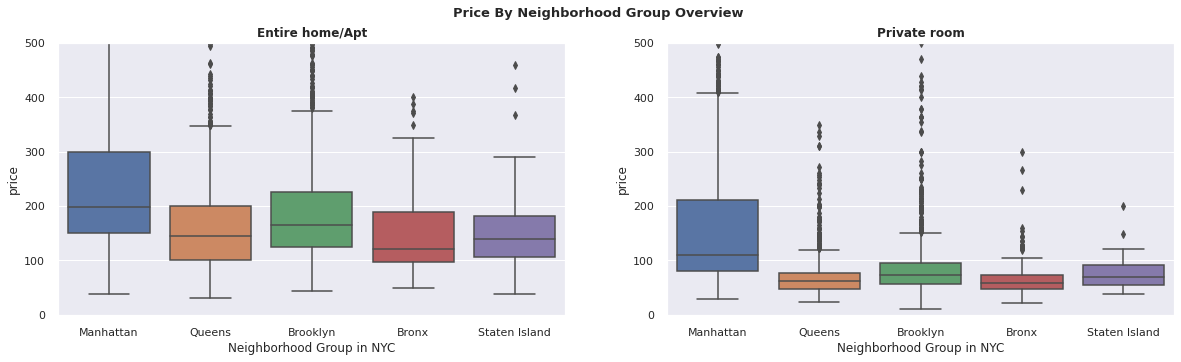

In [ ]:
#Price by neighborhood group
fig = plt.figure(figsize = (20,5))
plt.suptitle('Price By Neighborhood Group Overview', fontweight = 'bold', size = 13)
palette ={'Manhattan': "C0", "Queens": "C1", "Brooklyn": "C2", 'Bronx': 'C3', 'Staten Island': 'C4'}

plt.subplot(121)
sns.boxplot(data = top_host_table[top_host_table['room_type'] == 'Entire home/apt'],
            x = 'neighbourhood_group_cleansed',
            y = 'price', palette = palette,
            order = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
plt.ylim(0,500)
plt.xlabel('Neighborhood Group in NYC')
plt.title('Entire home/Apt', fontweight = 'bold')

plt.subplot(122)
sns.boxplot(data = top_host_table[top_host_table['room_type'] == 'Private room'],
            x = 'neighbourhood_group_cleansed',
            y = 'price', palette = palette, 
            order = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
plt.ylim(0,500)
plt.xlabel('Neighborhood Group in NYC')
plt.title('Private room', fontweight = 'bold')
fig.savefig('temp6.png', transparent=True)


plt.show()

Entire home/Apt:
  + Manhattan: 150 - 300
  + Queens: 100 - 200
  + Brooklyn: 120 - 220
  + Bronx: 100 - 190
  + Staten Island: 110 - 190


Private room:
  + Manhattan: 80 - 210
  + Queens: 60 - 80
  + Brooklyn: 60 - 100
  + Bronx: 50 - 70
  + Staten Island: 60 - 100

**FOR ENTIRE HOME/APT? HOW MANY BEDS ARE ENOUGH?** => 1,2,3 BEDS ~90%

In [ ]:
top_host_table.groupby('room_type')['beds'].sum()

room_type
Entire home/apt    12884.0
Hotel room           143.0
Private room        5662.0
Shared room          259.0
Name: beds, dtype: float64

In [ ]:
#Number of beds needed for entire home/apt
top_host_table['beds'] = top_host_table['beds'].astype('int')
beds = top_host_table[top_host_table['room_type'] == 'Entire home/apt']['beds'].value_counts().reset_index()
beds.columns = ['Number of beds', 'Counts']
beds['Proportion'] = round((beds['Counts'] / beds['Counts'].sum()) * 100, 1)
beds_plot = beds[:8]
beds_plot

,Number of beds,Counts,Proportion
0,1,2291,38.4
1,2,1919,32.1
2,3,1003,16.8
3,4,425,7.1
4,5,160,2.7
5,6,80,1.3
6,7,45,0.8
7,8,17,0.3


FOR PRIVATE ROOM? HOW MANY BEDS ARE ENOUGH? => 1 BED ~85%

In [ ]:
#Number of beds needed for private room
beds_pr = top_host_table[top_host_table['room_type'] == 'Private room']['beds'].value_counts().reset_index()
beds_pr.columns = ['Number of beds', 'Counts']
beds_pr['Proportion'] = round((beds_pr['Counts'] / beds_pr['Counts'].sum()) * 100, 1)

In [ ]:
beds_pr.head(3)

,Number of beds,Counts,Proportion
0,1,3886,83.2
1,2,652,14.0
2,3,89,1.9


**DESCRIPTION**

**ABOUT HOST => top_host_table['host_about']**

In [ ]:
#Drop nan value from 2 columns: description and host_about. Around 3000 rows
top_host_table.dropna(inplace = True)

In [ ]:
bot_host_table.dropna(inplace = True)

In [ ]:
#Drop duplicates row to get unique descriptions
top_host_table = top_host_table.drop_duplicates(subset = 'host_about')
bot_host_table = bot_host_table.drop_duplicates(subset = 'host_about')

In [ ]:
bot_host_table

,host_id,weighted_review_x,description,neighborhood_overview,host_since,host_location,host_about,host_is_superhost,host_verifications,host_has_profile_pic,...,amenities,price,weighted_review_y,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,host_since_year
1,3977023,4,"This comfortable room has high ceilings, big w...",The apartment is in a beautiful and friendly b...,2012-10-25,"New York, New York, United States",I study Anthropology at the New School. I am o...,f,"['email', 'phone']",t,...,heating essentials long term stays all...,$70.00,4,30,1125,1,4,t,2,2012
5,44118283,4,Master bedroom with 3 windows. Lots of light! ...,"Upper West Side, between Broadway and Riverside.",2015-09-13,"Paris, Île-de-France, France","I am french, a researcher in mathematics at Ec...",f,"['email', 'phone', 'work_email']",t,...,dryer heating essentials elevator ...,$100.00,4,30,43,1,4,f,1,2015
10,19227044,4,"Located in the beautiful Chateau Frontenac, Br...","A nice retreat from the city, this area of Pro...",2014-07-31,"Fishkill, New York, United States","I am an entertainment lighting designer, worki...",f,"['email', 'phone']",t,...,dryer shampoo essentials heating ...,$75.00,4,30,1125,1,4,f,1,2014
16,418289,4,Perfect space for a couples weekend in the cit...,"You will be staying in Upper East Side, few bl...",2011-03-02,"New York, New York, United States",Artist who loves traveling around the world ! ...,f,"['email', 'phone']",t,...,essentials bathtub cooking basics c...,$195.00,4,30,30,1,4,f,1,2011
23,23397935,4,Small studio on the garden level of a brownsto...,"Fort Greene is a family-friendly, tree-lined n...",2014-11-05,"Brooklyn, New York, United States",I work at a real estate firm in NYC and enjoy ...,f,"['email', 'phone']",t,...,carbon monoxide alarm tv smoke alarm ...,$280.00,4,3,7,1,4,t,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,49641082,0,Enjoy NYC while staying in one of the most pop...,We have absolutely fallen in love with this lo...,2015-11-22,"Los Angeles, California, United States",My name is Gary Peters and I am a Real Estate ...,f,"['email', 'phone']",t,...,carbon monoxide alarm heating essentia...,$39.00,0,30,1125,0,0,f,1,2015
5451,49592958,0,"Fantastic neighborhood, safe, quiet and easy t...","Central location, very safe, across the street...",2015-11-22,"New York, New York, United States",Respectful and quiet Bartender living in NYC,f,"['email', 'phone']",t,...,carbon monoxide alarm shampoo essentia...,$80.00,0,30,1125,0,0,f,1,2015
5454,49553194,0,This is a beautifully renovated 3BDRM APT. Bea...,Diversified enclosed tree lined street with vi...,2015-11-21,"East Orange, New Jersey, United States","Musician, Leadership Consultant, and father of...",f,"['email', 'phone']",t,...,clothing storage closet shared patio or ...,$181.00,0,30,30,0,0,f,1,2015
5492,49988341,0,The Tree of Life Community offers an Ecumenica...,We are .7 mile walk from the 2 Train Nereid ...,2015-11-27,"Saint Paul, Minnesota, United States",I am an English professor at the City Universi...,f,"['email', 'phone', 'work_email']",t,...,dryer heating essentials carbon mon...,$70.00,0,30,1125,0,0,f,1,2015


In [ ]:
#Count number of words in host_about => top host has description around 150-170 words
top_host_table['host_about_count'] = top_host_table['host_about'].str.split().str.len()
top_host_table['host_about_count'].value_counts().head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6     53
9     52
11    52
36    45
10    44
14    43
8     43
30    43
17    42
21    42
Name: host_about_count, dtype: int64

In [ ]:
bot_host_table['host_about_count'] = bot_host_table['host_about'].str.split().str.len()
bot_host_table['host_about_count'].value_counts().head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5     37
8     35
7     31
9     31
4     28
14    25
17    24
10    24
23    23
12    22
Name: host_about_count, dtype: int64

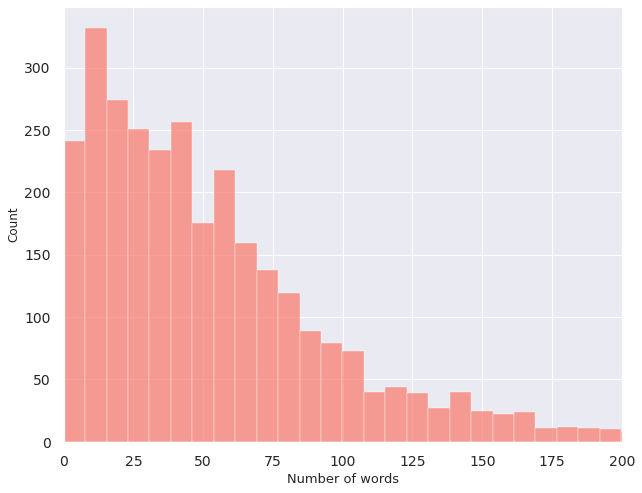

In [ ]:
#Plot number of words in host_about
fig = plt.figure(figsize = (10,8))
sns.histplot(data = top_host_table,
            x = 'host_about_count', color = 'salmon')
plt.xlabel('Number of words', size = 13)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim(0, 200)
plt.show()
fig.savefig('host_about_count.png', transparent=True)

In [ ]:
#Import necessary libraries for word cloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

stops = stopwords.words("english")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Create a function to clean description 
def clean_text(x):
    # Remove HTML 
    raw = BeautifulSoup(x, "html.parser")
    raw = raw.get_text()

    # Remove non-alphabetic
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()
    
    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if word not in stops]
    return ' '.join(clean)

top_host_table['host_about'] = top_host_table['host_about'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bot_host_table['host_about']

1       I study Anthropology at the New School. I am o...
5       I am french, a researcher in mathematics at Ec...
10      I am an entertainment lighting designer, worki...
16      Artist who loves traveling around the world ! ...
23      I work at a real estate firm in NYC and enjoy ...
                              ...                        
5450    My name is Gary Peters and I am a Real Estate ...
5451         Respectful and quiet Bartender living in NYC
5454    Musician, Leadership Consultant, and father of...
5492    I am an English professor at the City Universi...
5494    Hey there! Having lived in various spots of th...
Name: host_about, Length: 1064, dtype: object

In [ ]:
bot_host_table['host_about'] = bot_host_table['host_about'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'//'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
host_result = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in host_result:
            host_result[word] = 1
        else:
            host_result[word] += 1
            
top_host_table['host_about'].apply(count_word)

0        None
206      None
364      None
375      None
382      None
         ... 
10870    None
10872    None
10875    None
10878    None
10886    None
Name: host_about, Length: 3044, dtype: object

In [ ]:
bot_host_result = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in bot_host_result:
            bot_host_result[word] = 1
        else:
            bot_host_result[word] += 1
            
bot_host_table['host_about'].apply(count_word)

1       None
5       None
10      None
16      None
23      None
        ... 
5450    None
5451    None
5454    None
5492    None
5494    None
Name: host_about, Length: 1064, dtype: object

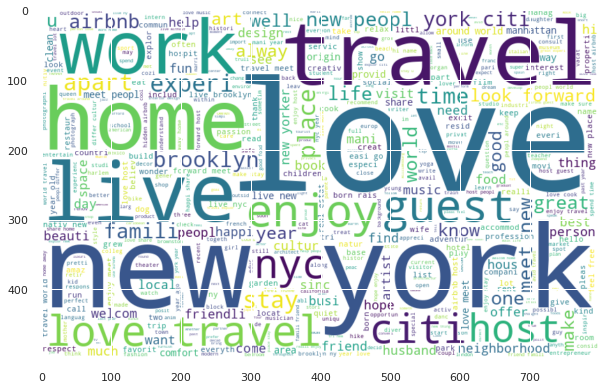

In [ ]:
#Plot word cloud chart of top_host_about
plt.figure(figsize=(10,10))
WC = WordCloud(width=800,height=500,max_words=500,min_font_size=5, background_color='white')

# The syntax requires parameter as a body of text. 
text = ' '.join(top_host_table['host_about'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

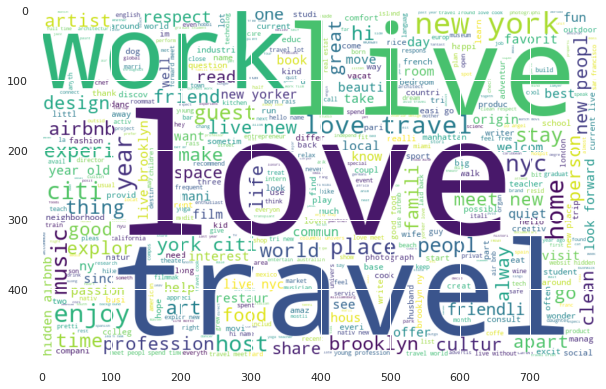

In [ ]:
#Plot word cloud chart of bot_host_about
plt.figure(figsize=(10,10))
WC = WordCloud(width=800,height=500,max_words=500,min_font_size=5, background_color='white')

# The syntax requires parameter as a body of text. 
text = ' '.join(bot_host_table['host_about'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

**DESCRIPTION => top_host_table['description']**

In [ ]:
#Count number of words in description => top host has description around 150-170 words
top_host_table['description_count'] = top_host_table['description'].str.split().str.len()
top_host_table['description_count'].value_counts().head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


166    101
165     96
161     91
159     90
160     88
164     88
171     86
163     86
167     85
169     77
170     76
162     73
173     72
172     70
158     70
168     69
157     67
156     67
154     63
174     62
Name: description_count, dtype: int64

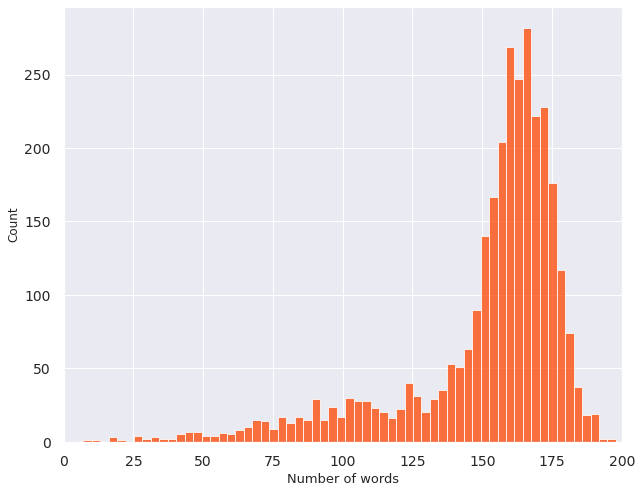

In [ ]:
#Plot number of words in description
fig = plt.figure(figsize = (10,8))
sns.histplot(data = top_host_table,
            x = 'description_count', color = 'orangered')
plt.xlabel('Number of words', size = 13)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim(0, 200)
plt.show()
fig.savefig('description_count.png', transparent=True)

In [ ]:
top_host_table['description'] = top_host_table['description'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
description_result = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in description_result:
            description_result[word] = 1
        else:
            description_result[word] += 1
            
top_host_table['description'].apply(count_word)

0        None
206      None
364      None
375      None
382      None
         ... 
10870    None
10872    None
10875    None
10878    None
10886    None
Name: description, Length: 3044, dtype: object

In [ ]:
top_host_table['description']

0        love studio heart lower east side central loca...
206      pictur worthi view person art galleri season r...
364      heart one coolest space citi soho retro style ...
375      welcom home creativ guesthous experi friendli ...
382      must visit shop eateri sight right doorstep sm...
                               ...                        
10870    wifi airbnb spaceloc function guest accesskeyo...
10872    perfect locat conveni privat bedroom share apa...
10875    doubl full suit accommod two guest sleep two s...
10878    pl kindli ask avail book apart locat two short...
10886    privat light spaciou room overlook lush garden...
Name: description, Length: 3044, dtype: object

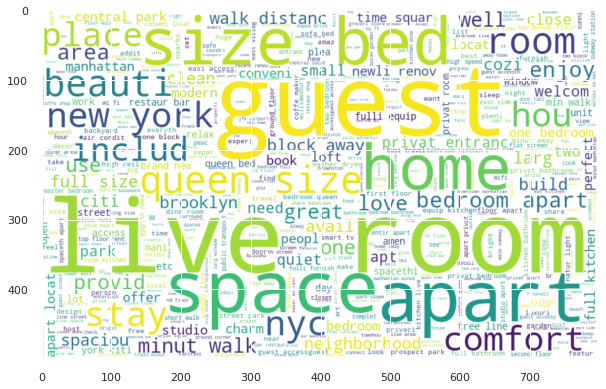

In [ ]:
#Plot word cloud chart of description
plt.figure(figsize=(10,10))
WC = WordCloud(width=800,height=500,max_words=500,min_font_size=5, background_color='white')

# The syntax requires parameter as a body of text. 
text = ' '.join(top_host_table['description'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

**NEIGHBORHOOD OVERVIEW => top_host_table['neighborhood_overview']**

In [ ]:
#Count number of words in neighborhood overview => top host has description around 25 - 50 words
top_host_table['neighborhood_overview_count'] = top_host_table['neighborhood_overview'].str.split().str.len()
top_host_table['neighborhood_overview_count'].value_counts().head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


28    46
45    46
17    43
36    41
19    39
48    38
39    37
34    37
41    37
42    36
21    36
25    35
29    35
16    34
54    34
31    34
37    34
32    33
43    33
40    33
Name: neighborhood_overview_count, dtype: int64

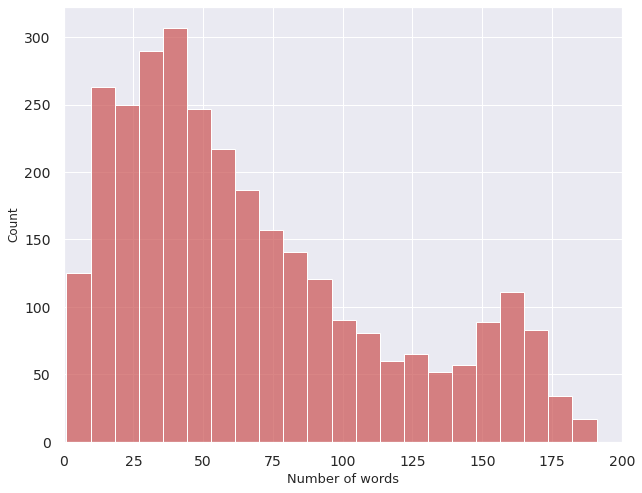

In [ ]:
#Barplot number of words in description
fig = plt.figure(figsize = (10,8))
sns.histplot(data = top_host_table,
            x = 'neighborhood_overview_count', color = 'indianred')
plt.xlabel('Number of words', size = 13)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim(0, 200)
plt.show()
fig.savefig('neighborhood_overview_count.png', transparent=True)

In [ ]:
top_host_table['neighborhood_overview'] = top_host_table['neighborhood_overview'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://gothamist.com/2019/05/21/beach_nyc_guide_2019.php?fbclid=IwAR3wHLSdWyuZ_BDdqCX1g4LkGSLilMvIcDs9BTzhchEwJNdL8seuu9reG-U" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
neighbor_result = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in neighbor_result:
            neighbor_result[word] = 1
        else:
            neighbor_result[word] += 1
            
top_host_table['neighborhood_overview'].apply(count_word)

0        None
206      None
364      None
375      None
382      None
         ... 
10870    None
10872    None
10875    None
10878    None
10886    None
Name: neighborhood_overview, Length: 3044, dtype: object

In [ ]:
# values = ['neighborhood', 'locat', 'also', 'new', 'york', 'great', 'th', 'within', 'mani', 'around', 'one']

top_host_table['neighborhood_overview_clean'] = top_host_table['neighborhood_overview'].str.replace('new york', '')
top_host_table['neighborhood_overview_clean'] = top_host_table['neighborhood_overview'].str.replace('neighborhood', '')
top_host_table['neighborhood_overview_clean'] = top_host_table['neighborhood_overview'].str.replace('area', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

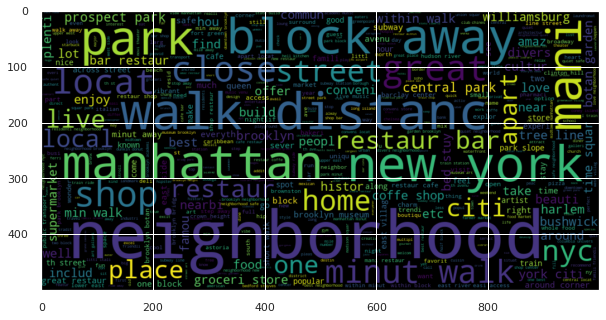

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(top_host_table['neighborhood_overview_clean'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()
#minute walk, block away, walk distance, restaurant, bar, central park, coffee shop, groceri store

# **IN CONCLUSION**
- Top hosts : 4,886 hosts with 10,893 listings contribute 80% to total number of reviews
- Important criterias to be top host performance
   + Profile pic
   + Identity verified
   + Verification (email, phone) - work email is unnecessary

- Accommodates: Couple - 4 people - SOLO

- Number of listings | top performance host => 2 cases
  + Case 1 (single business): 1-8 listings
  + Case 2 (system business): 52, 145, 101,192

- Host since: 
  + 2014 - 2018 (4-8 years experience)
  + 2021 (at least 1 year)

- Amenities
  + Number of amenities needed : 22 - 34 items
  + Top 25: smoke alarm, wifi, long term stays allowed, heating, hair dryer, hot water, iron, kitchen, hangers, air conditioning, carbon monoxide alarm, dishes and silverware, refrigerator, shampoo, cooking basics, coffee maker, bed linens, free street parking, fire extinguisher, microwave, stove, oven, first aid kit, essentials'

- Room type
 + 4 types: Entire home/Apt | Private room | Shared room | Hotel room
 + Top 2 room types: Entire home/Apt (55%) | Private room (43%)
 + Beds: Entire home/apt (1-2 beds) ~70% | Private room 1 bed (90%)
- Price
  + Max price:  9999 |  Min price:  10
  + Price range: 75 - 250
  + Entire room: 110 -250
  + Private room: 55 - 100

- Neighborhood/Price

  + Entire home/Apt: Manhattan: 150 - 300 | Queens: 100 - 200 | Brooklyn: 120 - 220 | Bronx: 100 - 190 | Staten Island: 110 - 190

  + Private room: Manhattan: 80 - 210 | Queens: 60 - 80 | Brooklyn: 60 - 100 | Bronx: 50 - 70 | Staten Island: 60 - 100

- Description | About Host('host_about')
  + Description: 6-36 words
  + Surprisingly, top hosts keep their self-intro as short as possible around 6-36 words with key words: *love, home, travel, enjoy....*

- Description | About Listings('description')
  + Description: 150-170 words
  + Don't forget to list out all the rooms and leverage adjectives like *close, quiet, private, clean...*

- Description | About Neighborhood('neighborhood_overview')
  + Description: 25-50 words
  + People prefered near, walkable with adjective like *(minute walk, block away, walk distance)* to places *(restaurant, bar, central park, coffee shop, groceri store...)*